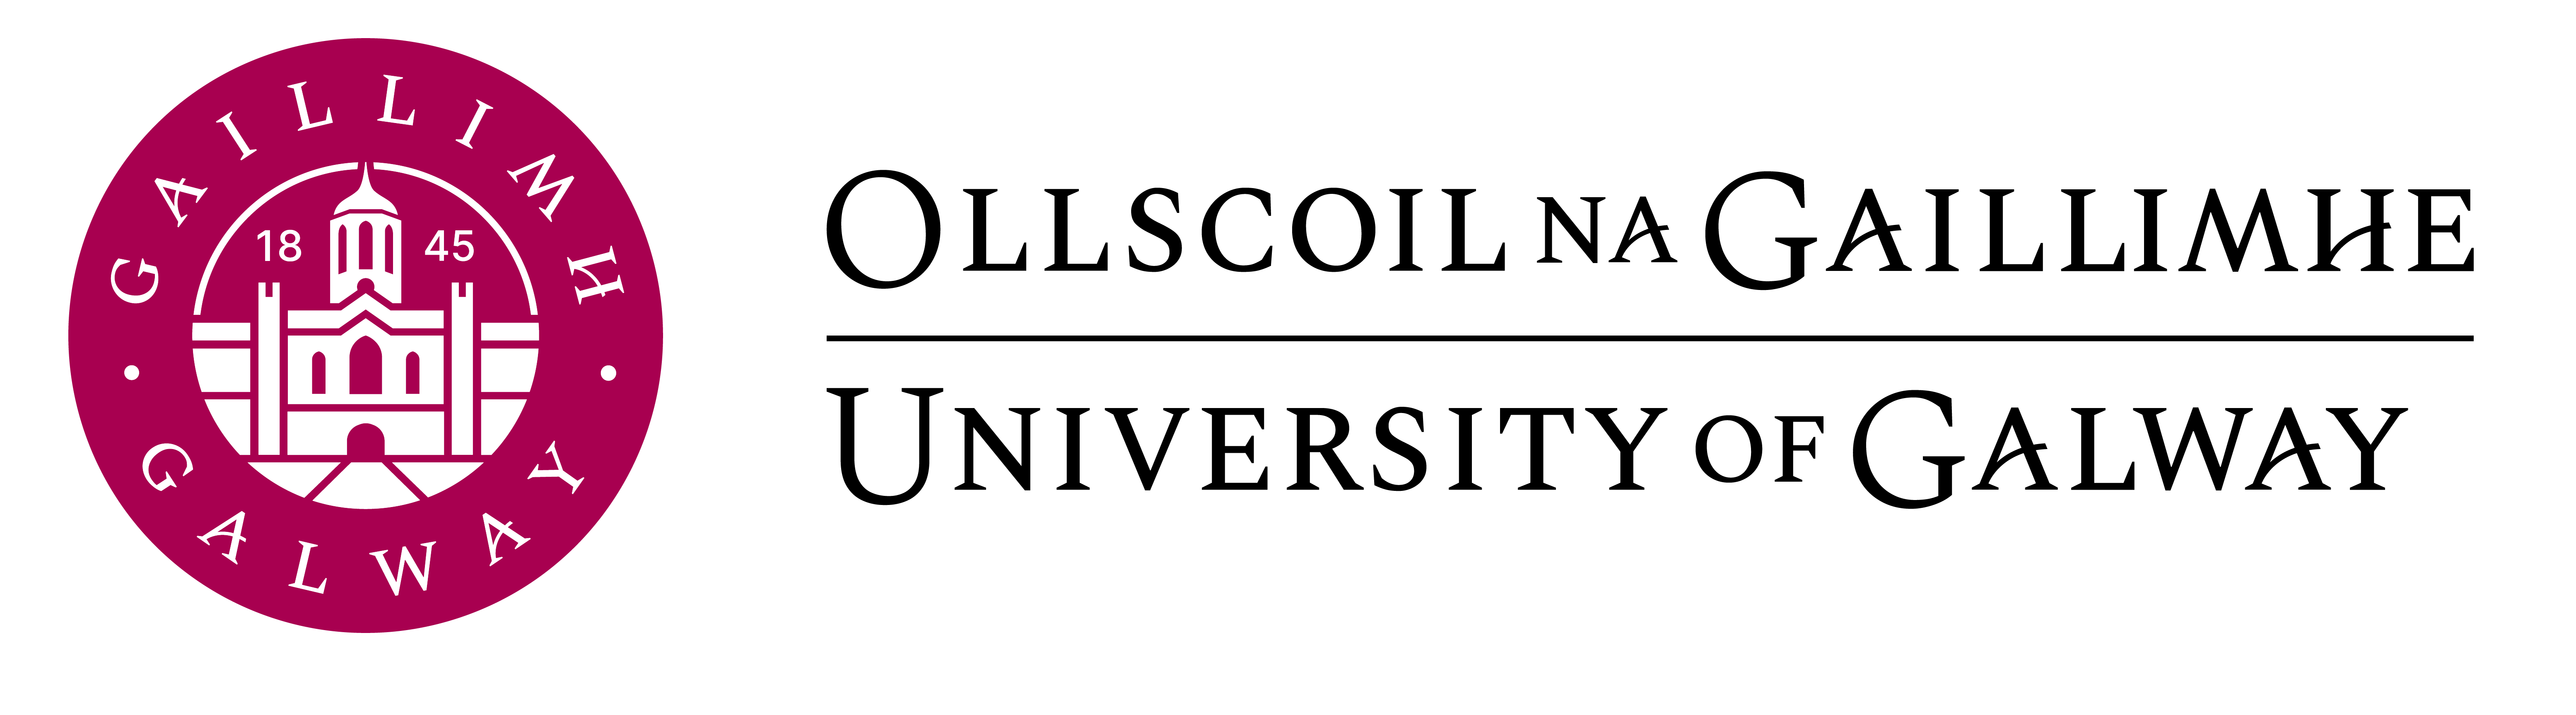

# ***CT5120 Assignment 1*** (Total 100 marks)

> ⚠️ <font color="red">**Disclaimer:** This assignment contains examples of hate speech and offensive content, included strictly for academic purposes. </font>

---
# **Task**

This task is focused on **Hate Speech Detection** and **Rationale Extraction** from social media comments.  
Please complete this task and **upload your answers to Canvas as an iPython Notebook ONLY with saved outputs**.  

📅 ***Deadline:*** **23:59** on **October 27th, 2025**  (Ireland Time)

⚠️ ***Late submissions*** will be penalised by **1% per day (for one week until November 03, 2025)**. Submission after these deadlines will not be considered.


👤 This is an ***individual assignment*** and your work must be your own.  

**<font color="red">Strictly no Generative AI</font> : Do the assignment by yourself, write codes and answers fully in your own words without using AI tools.**  

<font color="red">**Note:** You must disable the AI features on Google Colab before working on this assignment.  
  
You can follow this video guide: [How to disable AI in Colab](https://youtu.be/qrGZv8nPh1o)</font>  


You may use libraries such as **Scikit-Learn** to complete this assignment.

⚠️ **Important:**  
- Make sure you fill in your **Name** and **Student ID** by running the below cell.  
- Do **not** modify any other cells in this notebook except those explicitly marked with  
  **`# YOUR CODE HERE`** or **`# YOUR ANSWER HERE`**.  
- Ensure that all cells run successfully before submission.  
- We recommend using **Google Colab** to avoid any dependency issues.  



---
**Student Details**

In [173]:
# Enter your details below
NAME = input("Student Name   : ")
STUDENT_ID = input("Student ID     : ")

# print(f"Student Name   : {NAME}")
# print(f"Student ID     : {STUDENT_ID}")


Student Name   : Jyothis Shajan Maniyamkattuthadathil
Student ID     : 25241487


---

## **Summary**

In this task, given a tweet (text), you have two objectives:

1. **Hate Speech Detection** – Classify the tweet into one of three classes:  
   - **Hateful**  
   - **Offensive**  
   - **Normal**

2. **Hate Rationale Extraction** – Extract the sequence of words from the tweet that expresses the hate.

---

### **Example (from the train dataset)**
<!-- <p align="center">
  <img src="https://drive.google.com/uc?id=1tqMOBR7YJufemSmsArlFBRbgbKxgrK2_" alt="Second Image" width="700"/>
</p> -->

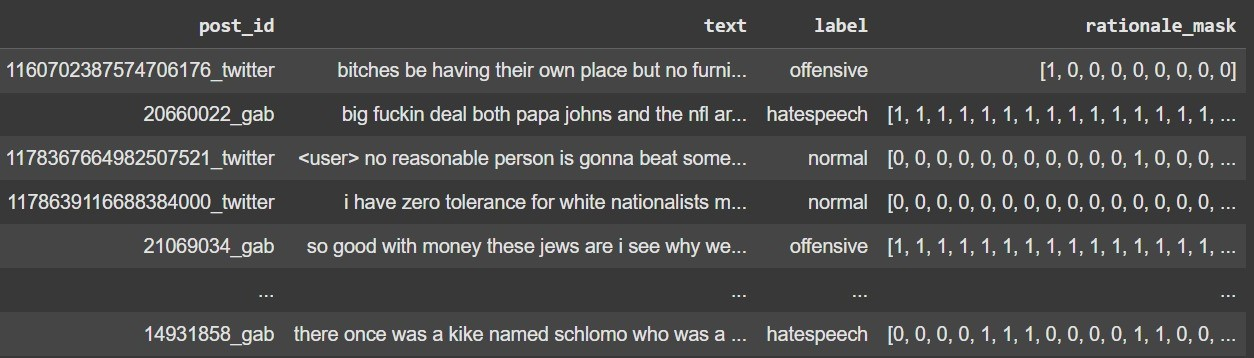

### 📑 Dataset Columns

1. **`post_id`** – Unique ID of the post (with platform name).  
2. **`text`** – The raw text content of the social media post (what users wrote).  
3. **`label`** – The category of the post:  
   - **normal** → harmless text  
   - **offensive** → rude/insulting text  
   - **hatespeech** → hateful text targeting groups/people  
4. **`rationale_mask`** – Highlights important words in the text  
   - `1` = important word (evidence for hate/offense)  
   - `0` = not important  


---
# **Dataset Details**

The dataset is divided into **three parts**: **Training**, **Development (Dev)**, and **Test** sets.  

1. **Training set**  
   - Used to **train your model** (learn patterns from the data).  
   - This is the largest portion of the dataset.  

2. **Development (Dev) set**  
   - A small part of the training data that is **held out**.  
   - Used to **validate your model** while training and for **hyperparameter tuning**.  
   - Helps avoid overfitting (your model performing well on training but poorly on unseen data).  

3. **Test set**  
   - Contains **unlabeled data** (labels are hidden).  (*HERE*: in this assignment we provided labeled dataset)
   - Used only for **final evaluation** of your model.  
   - You will generate a **prediction file** for this set and submit it.  

---

# **Installing packages**

In [174]:
# Use this cell for installing the packages by uncommenting below only if you are running this notobook locally.


# !pip install pandas
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install seaborn
# !pip install nltk

# **Importing Libraries & Dataset files**

In [175]:
import re
import inspect
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# Load the dataset

def download_file_from_google_drive(file_id):
    """
    Downloads a CSV file from Google Drive using its file_id
    and returns the content as text.
    """
    URL = "https://drive.google.com/uc?export=download&id=" + file_id
    response = requests.get(URL)
    response.raise_for_status()
    return response.text

# Replace FILE_ID with the actual IDs from your links
# file_id_train = "/content/drive/MyDrive/CT5120_Assignment_1/train.csv"
# file_id_dev   = "/content/drive/MyDrive/CT5120_Assignment_1/dev.csv"
# file_id_test  = "/content/drive/MyDrive/CT5120_Assignment_1/test.csv"

# # Read CSVs directly into pandas
# df_train = pd.read_csv(StringIO(download_file_from_google_drive(file_id_train)))
# df_dev   = pd.read_csv(StringIO(download_file_from_google_drive(file_id_dev)))
# df_test  = pd.read_csv(StringIO(download_file_from_google_drive(file_id_test)))

df_train = pd.read_csv('/content/drive/MyDrive/CT5120_Assignment_1/train.csv')
df_dev  = pd.read_csv('/content/drive/MyDrive/CT5120_Assignment_1/dev.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/CT5120_Assignment_1/test.csv')

# Print dataset shapes
print("Train shape:", df_train.shape)
print("Dev shape:", df_dev.shape)
print("Test shape:", df_test.shape)


Train shape: (3224, 4)
Dev shape: (806, 4)
Test shape: (1008, 4)


# **1. Exploratory Data Analysis (EDA) (Total = 20 marks)**

## **Task 1a: Class distribution (5 marks)**

---

*Note*: The output of the code should look like this (color doesn't matter).
<!-- <p style="margin-left:200px;">
  <img src="https://drive.google.com/uc?id=15dsJTaL1DDzwXk3sk3N2rTBNp3h5AZZx" alt="Inserted Image" width="600"/>
</p> -->

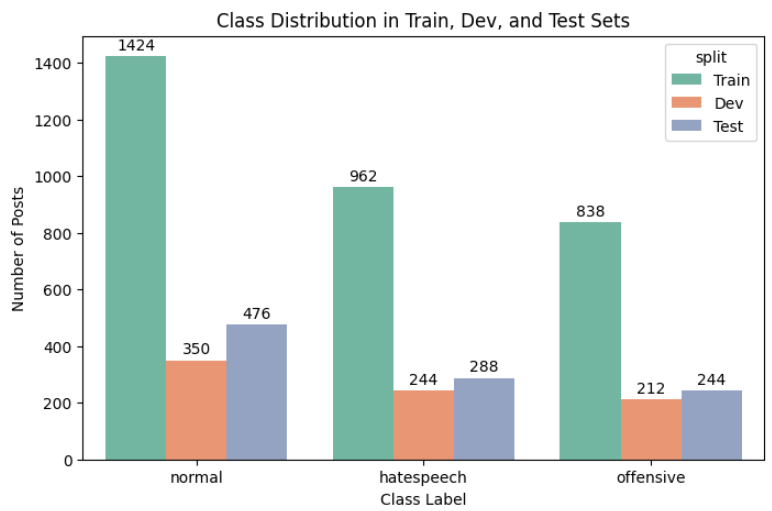


Class Distribution:
            Train  Dev  Test
label                       
normal       1424  350   476
hatespeech    962  244   288
offensive     838  212   244



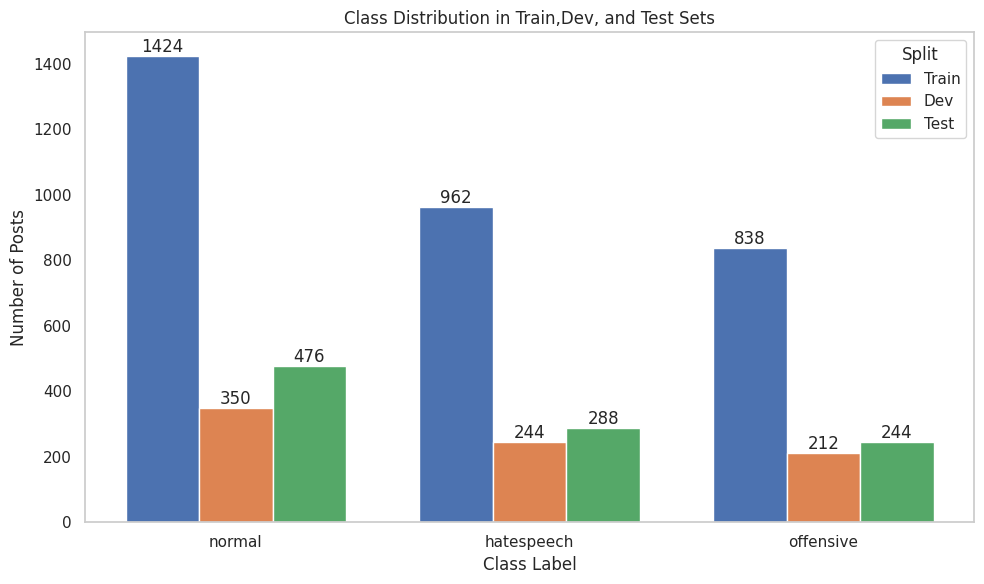

In [178]:
def plot_class_distribution(df_train, df_dev, df_test):
    """
    TODO:
    - Count the number of posts for each label in Train, Dev, and Test sets
    - Combine the counts into one dataframe
    - Plot a bar chart comparing the distributions across splits
    - Add counts on top of each bar for clarity
    """
    # YOUR CODE HERE
    trainset_counts = df_train['label'].value_counts()
    devset_counts = df_dev['label'].value_counts()
    testset_counts = df_test['label'].value_counts()
    # Putting  together dataframe
    distribution_df = pd.DataFrame({
        'Train': trainset_counts,
        'Dev': devset_counts,
        'Test': testset_counts
    })

    print("Class Distribution:")
    print(distribution_df)
    print()

    # Plotting a bar chart as the above output
    fig, ax = plt.subplots(figsize=(10, 6))

    labels = distribution_df.index
    x = np.arange(len(labels))
    width = 0.25

    # Creating bars for each dataset provided
    bar1 = ax.bar(x - width, distribution_df['Train'], width, label='Train')
    bar2 = ax.bar(x, distribution_df['Dev'], width, label='Dev')
    bar3 = ax.bar(x + width, distribution_df['Test'], width, label='Test')

    # Adding count labels above bar
    for bars in [bar1, bar2, bar3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,'%d' % int(height), ha='center', va='bottom')

    ax.set_xlabel('Class Label')
    ax.set_ylabel('Number of Posts')
    ax.set_title('Class Distribution in Train,Dev, and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(title='Split')
    ax.grid(False)

    plt.tight_layout()
    plt.show()

    #raise NotImplementedError() # comment this line one you entered your code

# Call the function
plot_class_distribution(df_train, df_dev, df_test)

## **Task 1b: Rationale analysis (Total 10 marks)**

**1. Span length charts:** (5 marks)


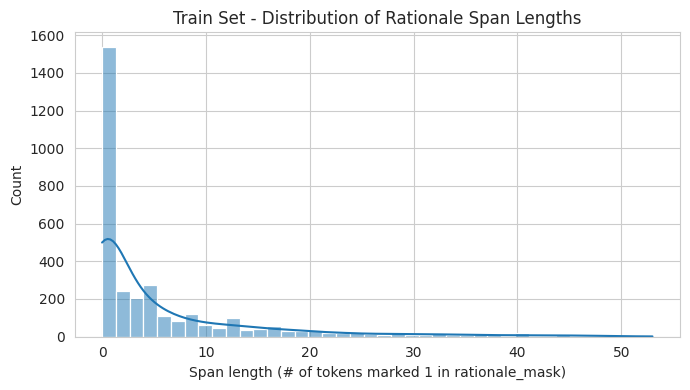

**2. Rationale Coverage Ratio:** (5 marks)

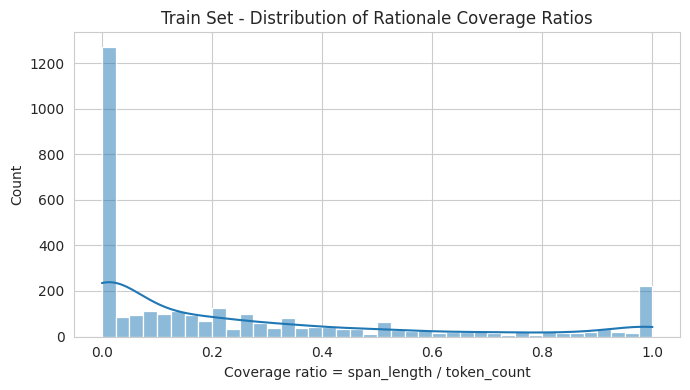

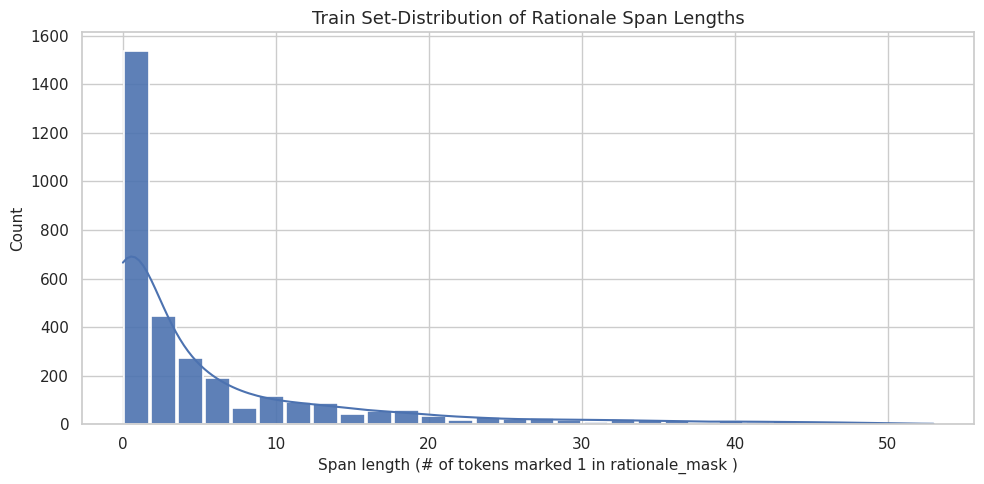

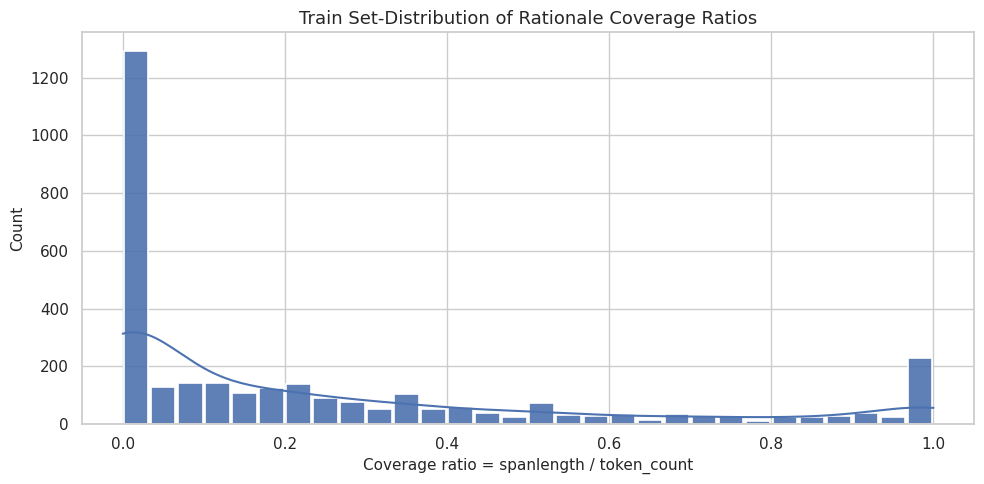

In [179]:
def analyze_span_and_tokens(df):
    """
    TODO:
    - Plot a bar chat for distribution of rationale span length - (5 marks)
    - Plot a bar chat for distribution of rationale coverage ratios - (5 marks)
    """
    # YOUR CODE HERE
    spanlengths = []
    coverageratios = []

    for idx, row in df.iterrows():
        # Converting rationale_mask string to list
        if isinstance(row['rationale_mask'], str):
            mask_str = row['rationale_mask'].strip('[]')
            mask = [int(x.strip()) for x in mask_str.split(',')]
        else:
            mask = row['rationale_mask']
        spanlength = sum(mask)
        spanlengths.append(spanlength)
        totalTokens = len(mask)
        ratio = spanlength / totalTokens if totalTokens > 0 else 0
        coverageratios.append(ratio)

    df['spanlength'] = spanlengths
    df['coverage_ratio'] = coverageratios

    # Apply seaborn style for clean visuals
    sns.set(style="whitegrid")

    # --- Plot 1: Span Length Distribution ---
    plt.figure(figsize=(10, 5))
    sns.histplot(df['spanlength'],kde=True,bins=30,edgecolor='white',linewidth=1.2,alpha=0.9,shrink=0.9)
    plt.title('Train Set-Distribution of Rationale Span Lengths', fontsize=13)
    plt.xlabel('Span length (# of tokens marked 1 in rationale_mask )', fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.tight_layout()
    plt.show()

    # Second plot : Coverage Ratio of Distribution in the datset given
    plt.figure(figsize=(10, 5))
    sns.histplot(df['coverage_ratio'],kde=True,bins=30,edgecolor='white',linewidth=1.2,alpha=0.9,shrink=0.9)
    plt.title('Train Set-Distribution of Rationale Coverage Ratios', fontsize=13)
    plt.xlabel('Coverage ratio = spanlength / token_count', fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.tight_layout()
    plt.show()
    return df
    #raise NotImplementedError() # comment this line one you entered your code

# Call the function
# For train set
train = analyze_span_and_tokens(df_train)

## **Task 1c: Explanation (5 marks)**

**Question:** Explain the Exploratory Data Analysis (EDA) process carried out in *Task 1a* and *Task 1b*





Your explanation should be written in your own words `(strictly no use of Generative AI)` and should not exceed **100 words** in length.

```
# YOUR ANSWER HERE
In Task 1a, Class distribution across different datasets was analysed to check  data  balance.
The Bar plot reveals slight imbalance in data, with normal posts class having labelled the highest followed by
hatespeech and offensive.
EDA helped in identifying bias and the need of stratified sampling or weighted loss functions to be used in training so the model avoids favoring normal class labelling.
In task 1b we analyse span length and coverage ratio.
Most span length are short and focused on some key words and coverage ratio showed that only  some parts of the text were annotated.




```

# **2. Hate Speech Detection (Total = 40 marks)**

**Task:** Train a sequence classification model. The model should take the text as input and return 1 out of 3 as hate speech label.

**Label**: Hateful, Offensive, Normal

`INPUT : (text)`

`OUTPUT: Hate_label (i.e. one class from (Hateful, Offensive, Normal))`

Using the data provided in the Training and Development sets, extract feature vectors by applying the TF-IDF encoding technique. Ensure that the number of features in the TF-IDF encoded data is fixed at 1024.

## **Task 2a: Feature extraction (5 marks)**
In this task, you are required to extract numerical features from the text data using **TF-IDF (Term Frequency-Inverse Document Frequency)**.  

- Use `TfidfVectorizer` from `sklearn` to convert the text into feature vectors for training, validation, and test sets.
- Return the feature matrices (`X_train`, `X_dev`, `X_test`) along with their corresponding labels (`y_train`, `y_dev`, `y_test`).  




In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer


def extract_features(df_train, df_dev, df_test):


    """This function takes the dataframes for training, tesing and validation and
        returns encoded features and the labels required to train the models

        train_x = [training TFIDF features]
        dev_x = [validation TFIDF features]
        test_x = [test TFIDF features]

        train_y = [lab_1, lab_2 , ..., lab_n]
        dev_y = [lab_1, lab_2 , ..., lab_n]a
        test_y = [lab_1, lab_2 , ..., lab_n]
    """

    # YOUR CODE HERE
    # Initialize TF-IDF vectorizer with standard NLP preprocessing
    tfidfVectorizer = TfidfVectorizer(
        max_features=1024,       # fixed vocabulary size
        ngram_range=(1, 2),      # capture both unigrams & bigrams
        lowercase=True,
        strip_accents='unicode',
        stop_words='english'     # removes common stop words
    )

    # Fit on training text and transform all splits
    X_train = tfidfVectorizer.fit_transform(df_train['text'])
    X_dev   = tfidfVectorizer.transform(df_dev['text'])
    X_test  = tfidfVectorizer.transform(df_test['text'])

    # Extract labels
    y_train = df_train['label'].values
    y_dev   = df_dev['label'].values
    y_test  = df_test['label'].values

    # Display shape information
    print(f"Training set shape: {X_train.shape}")
    print(f"Development set shape: {X_dev.shape}")
    print(f"Test set shape: {X_test.shape}")
    print(f"TF-IDF vocab size: {X_train.shape[1]}")

    return (X_train, y_train), (X_dev, y_dev), (X_test, y_test)




    #raise NotImplementedError()  # comment this line one you entered your code


In [181]:
(train_x, train_y), (dev_x, dev_y), (test_x, test_y) = extract_features(df_train, df_dev, df_test)

Training set shape: (3224, 1024)
Development set shape: (806, 1024)
Test set shape: (1008, 1024)
TF-IDF vocab size: 1024


In [182]:
assert train_x.shape[0] == df_train.shape[0]
assert dev_x.shape[0] == df_dev.shape[0]
assert test_x.shape[0] == df_test.shape[0]

## **Task 2b: Support Vector Machines (SVM) (10 marks)**

In this task, you are required to train and validate a classifier using the TF-IDF features from the previous step.  

- Implement the `get_model` function to build and train a Support Vector Machine (SVM) model.  
- Train the model using the training data (`train_x`, `train_y`).  
- Use the development set (`dev_x`, `dev_y`) to validate the model and report its performance.  
- Ensure that the returned model is correctly initialized, trained, and ready for testing.  


In [183]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

def get_model(train_x, train_y, dev_x, dev_y):

    """
    Build and train an SVM classifier using training data.
    Validate the model on the development set.
    print("Development Accuracy:", accuracy_score(dev_y, dev_pred))
    Return the trained model.
    """
    # YOUR CODE HERE
    #Using class weight=balanced as data class is imbalanced
    svm_model = LinearSVC(C=1.0,class_weight='balanced',max_iter=8000,random_state=45)

    # Training the classifier model
    svm_model.fit(train_x, train_y)
    print("completed svm model training .\n")

    # Predicting on development data using the gene
    dev_pred = svm_model.predict(dev_x)

    # Computing metrics
    dev_accuracy = accuracy_score(dev_y, dev_pred)
    dev_f1_macro = f1_score(dev_y, dev_pred, average='macro')

    print("Validation Results:")
    print(f"Development Accuracy   : {dev_accuracy:.4f}")
    print(f"Development Macro-F1   : {dev_f1_macro:.4f}\n")

    # Detailed performance by class
    print("Classification Report:")
    print(classification_report(dev_y, dev_pred, zero_division=0))

    return svm_model



    #raise NotImplementedError()   # comment this line one you entered your code

In [184]:
# call the function
model = get_model(train_x, train_y, dev_x, dev_y)

completed svm model training .

Validation Results:
Development Accuracy   : 0.5856
Development Macro-F1   : 0.5601

Classification Report:
              precision    recall  f1-score   support

  hatespeech       0.63      0.62      0.63       244
      normal       0.66      0.69      0.68       350
   offensive       0.39      0.36      0.38       212

    accuracy                           0.59       806
   macro avg       0.56      0.56      0.56       806
weighted avg       0.58      0.59      0.58       806



In [185]:
model_type = str(type(model))
assert 'sklearn' in model_type
assert 'svm' in model_type

## **Task 2c: Predictions and Evaluation (5 marks)**

In this task, you will use the trained model to make predictions on unseen test data and evaluate its performance.  

- Implement the `make_predictions_on_test` function to generate predictions for the test set.  
- Implement the `calc_pre_recall_f1` function to calculate **precision**, **recall**, and **F1-score** using the predicted and true labels.  
- Report the evaluation results to assess the performance of your model.  


In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def make_predictions_on_test(test_x, model):

    # YOUR CODE HERE
    # Generating predictions
    testpredictions = model.predict(test_x)

    # Evaluating accuracy of test set
    test_accuracy = accuracy_score(test_y, testpredictions)
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # Print classification report for per-class evaluation
    print("Detailed Classification Report:")
    print(classification_report(test_y, testpredictions, zero_division=0))

    return testpredictions


    #raise NotImplementedError()   # comment this line one you entered your code

In [187]:
pred_y = make_predictions_on_test(test_x, model)

Test Accuracy: 0.5704

Detailed Classification Report:
              precision    recall  f1-score   support

  hatespeech       0.60      0.56      0.58       288
      normal       0.65      0.70      0.67       476
   offensive       0.36      0.33      0.34       244

    accuracy                           0.57      1008
   macro avg       0.53      0.53      0.53      1008
weighted avg       0.56      0.57      0.57      1008



In [188]:
assert len(pred_y) == test_y.shape[0]

In [189]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calc_pre_recall_f1(pred_y, test_y):

    # YOUR CODE HERE
    precision = precision_score(test_y, pred_y, average='macro')
    recall = recall_score(test_y, pred_y, average='macro')
    f1 = f1_score(test_y, pred_y, average='macro')
    return precision, recall, f1

    #raise NotImplementedError()   # comment this line one you entered your code

In [190]:
prec_mac_svm, rec_mac_svm, f1_mac_svm = calc_pre_recall_f1(pred_y, test_y)

print(f"Precision (macro): {prec_mac_svm:.4f}")
print(f"Recall (macro): {rec_mac_svm:.4f}")
print(f"F1-score (macro): {f1_mac_svm:.4f}")

Precision (macro): 0.5349
Recall (macro): 0.5302
F1-score (macro): 0.5319


In [191]:
assert prec_mac_svm <= 1.0
assert prec_mac_svm > 0.0

assert rec_mac_svm <= 1.0
assert rec_mac_svm > 0.0

assert f1_mac_svm <= 1.0
assert f1_mac_svm > 0.0
# DO NOT DELETE !!!

<!-- ## **Task 2d: Explanation (10 marks)**

Provide a detailed explanation of the implementation process for feature extraction using TF-IDF and the Support Vector Machine (SVM) model, including how predictions are generated. -->

## **Task 2d: Explanation (10 marks)**

Provide a detailed explanation of your implementation for this task.  

- Describe the process of **feature extraction** using TF-IDF and why it is suitable for text classification.  
- Explain how the **Support Vector Machine (SVM)** model was trained and validated using the training and development sets.  
- Discuss how predictions were generated on the test set.  
- Comment on the evaluation metrics (precision, recall, F1-score) and what they reveal about your model's performance.  


Your explanation should be written in your own words `(strictly no use of Generative AI)` and should not exceed **150 words** in length.

```
# YOUR ANSWER HERE



Developed a text classification model using TF-IDF,
which converts terms in the corpus to numerical vectors,
as machine learning models cannot understand text.
A Linear SVM model was trained using unigram and bigram to
capture better context with fixed size of 1024.
Trained the Linear Support Vector Machine using training set and used development set to do the validation to test the hypothesis created by the model. SVM is then train on unseen test data and the predicted values has been evaulated based on precision,recall and f1-score to guage the performance and used macro averaging to tackle class imbalance.


Resulting model achieved 57% accuracy and was able to classify each class representing balanced performance across all class both major and minor demonstrating effectively that tf-idf and svm can capture textual patterns for hate speech detection

```



## **Task 2e: Improving the prediction (5 marks)**

In this task, you will experiment with improving the prediction performance of your model.  

- Implement the `improved_predictions` function to train a classifier using the training data (`train_x`, `train_y`).  
- Use the development set (`dev_x`, `dev_y`) to guide improvements, such as parameter tuning, trying alternative feature extraction methods, or alternative classifier.  
- Once the model is trained and validated, use it to generate predictions on the test set (`test_x`).  
- Return the predicted labels and ensure they match the size of the test set.  


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np


def improved_predictions(train_x, train_y, dev_x, dev_y, test_x):
    """
    Train an improved classifier using train_x, train_y and validate on dev_x and dev_y.
    Apply improvements (e.g., parameter tuning, feature extraction methods, alternative models).
    Use the final model to generate predictions on the test_x.
    """
    vectorizer = TfidfVectorizer(max_features=2048,ngram_range=(1, 3),min_df=2,max_df=0.95,sublinear_tf=True)
    train_x_vec = vectorizer.fit_transform(train_x)
    dev_x_vec = vectorizer.transform(dev_x)
    test_x_vec = vectorizer.transform(test_x)

    # Train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=300,max_depth=25,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',class_weight='balanced',random_state=42,n_jobs=-1)
    model.fit(train_x_vec, train_y)

    # evaluating model using dev
    dev_pred = model.predict(dev_x_vec)
    dev_acc = accuracy_score(dev_y, dev_pred)
    dev_f1Macro = f1_score(dev_y, dev_pred, average='macro')

    print(f"Development Accuracy: {dev_acc:.4f}")
    print(f"Development Macro F1: {dev_f1Macro:.4f}")
    print("\nClassification Report:")
    print(classification_report(dev_y, dev_pred, zero_division=0))

    # Generating test set predictions
    test_pred = model.predict(test_x_vec)
    return test_pred

#converting train and text dataframe to list to avoid csr matrix errors
train_x = df_train['text'].tolist()
train_y = df_train['label']
dev_y = df_dev['label']
dev_x = df_dev['text'].tolist()
test_x = df_test['text'].tolist()

    #raise NotImplementedError()

In [193]:
y_pred_improved = improved_predictions(train_x, train_y, dev_x, dev_y, test_x)
assert len(y_pred_improved) == test_y.shape[0]
assert all([y in set(test_y) for y in set(y_pred_improved)])



Development Accuracy: 0.6055
Development Macro F1: 0.5885

Classification Report:
              precision    recall  f1-score   support

  hatespeech       0.67      0.61      0.64       244
      normal       0.67      0.69      0.68       350
   offensive       0.43      0.45      0.44       212

    accuracy                           0.61       806
   macro avg       0.59      0.59      0.59       806
weighted avg       0.61      0.61      0.61       806



In [194]:
prec_mac_improv, rec_mac_improv, f1_mac_improv = calc_pre_recall_f1(y_pred_improved, test_y)
# DO NOT DELETE THIS CELL !!!

## **Task 2f: Explanation (5 marks)**

Provide a concise explanation of the approach you used in Task 2e to improve prediction performance.  

Your explanation should:  
- Clearly state the specific change or improvement you applied.  
- Explain why you chose this approach and how it addresses limitations of the previous approach.  

Your explanation should be written in your own words `(strictly no use of Generative AI)` and should not exceed **100 words** in length.




```
# YOUR ANSWER HERE
Replaced Linear SVM model with RandomForest Classifier with
enhanced TF-IDF featture representation by increasing ngram range
and maxfeature to 2048 to improve performance. Random forest can use
class weights to model non-linear decision boundaries and will handle
class imbalance effectively. A higher accuracy and macro F1 was observed in the new model
demonstrating good overall geenralisation across hate speech categories it
also learns complex patterns in text


```



# **3. Rationale Extraction (Total = 40 marks)**

The goal of this task is to **extract the hate rationale** given the text and its label.  
A hate rationale is the part of the text (a span of words or phrases) that most strongly conveys hate/offensive content, and it is the justification for why the text is labeled as hate speech or offensive.  

**Input**: (text, label)  
**Output**: (selected_text / rationale span)  

**Example**  

- **Text**: *"<user> i really fucking hate you right now"*  
- **Label**: *hate*  
- **Extracted Rationale**: *"fucking hate you"*  

You may use any suitable **evaluation metrics** (e.g., accuracy, F1-score, token-level overlap, Jaccard similarity) depending on your approach.  




## **Task 3a: Model Implementation and Improvement (20 marks)**

In this task, you will build a model for rationale identification.  

- **Input**: Training set (`train_df`) and Development set (`dev_df`).  
- **Output**: A trained model, along with the evaluation score on the development set.  
- You are expected to implement a baseline model and then improve it (e.g., through hyperparameter tuning, model selection, or different architectures).  
- Print the evaluation score(s) for the chosen metric(s).  


In [195]:
from sklearn.linear_model import LogisticRegression
from ast import literal_eval
from sklearn.metrics import jaccard_score


def train_rationale_model(train_df, dev_df):
    """
    Train a rationale identification model on the training set
    and evaluate it on the development set.

    Args:
        train_df (pd.DataFrame): Training split with [post_id, text, label, rationale_mask].
        dev_df (pd.DataFrame): Development split with [post_id, text, label, rationale_mask].

    Returns:
        model (object): Trained rationale identification model.
        score (float/dict): Evaluation score(s) on the dev set.
    """
    # YOUR CODE HERE
    #ExtractING text values
    trainingtexts = train_df['text'].tolist()
    train_y = train_df['label'].tolist()
    devtexts = dev_df['text'].tolist()
    dev_y = dev_df['label'].tolist()
    dev_rationale_masks = dev_df['rationale_mask'].tolist()

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=2048, ngram_range=(1, 3), stop_words='english')
    X_train = vectorizer.fit_transform(trainingtexts)
    X_dev = vectorizer.transform(devtexts)

    # Train baseline model
    model = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)
    model.fit(X_train, train_y)

    # Identify top features per class
    feature_names = np.array(vectorizer.get_feature_names_out())
    labels = model.classes_
    rationale_dict = {}
    for i, label in enumerate(labels):
        top_indices = np.argsort(model.coef_[i])[-50:]
        rationale_dict[label] = set(feature_names[top_indices])

    # Evaluate rationale extraction
    jaccard_scores = []
    for text, gold_mask, label in zip(devtexts, dev_rationale_masks, dev_y):
        tokens = text.lower().split()
        pred_tokens = [t for t in tokens if t in rationale_dict.get(label, set())]
        pred_mask = np.array([1 if t in pred_tokens else 0 for t in tokens])

        if isinstance(gold_mask, str):
            gold_mask = literal_eval(gold_mask)
        gold_mask = np.array(gold_mask, dtype=int)

        min_len = min(len(pred_mask), len(gold_mask))
        if min_len > 0:
            jaccard = jaccard_score(gold_mask[:min_len], pred_mask[:min_len], zero_division=0)
            jaccard_scores.append(jaccard)

    avg_jaccard = float(np.mean(jaccard_scores)) if jaccard_scores else 0.0
    print(f"Development set jaccard Similarity: {avg_jaccard:.4f}")

    model_obj = {'classifier': model,'vectorizer': vectorizer,'rationale_dict': rationale_dict}

    return model_obj, avg_jaccard



    #raise NotImplementedError()

# Example usage
model, dev_score = train_rationale_model(df_train, df_dev)
print("Development Score:", dev_score)

Development set jaccard Similarity: 0.1295
Development Score: 0.12952142660073346


### **Task 3b: Rationale Detection (5 marks)**

In this task, you will use the trained model to detect rationales on unseen text.  

- **Input**: Test set (`test_df`) and the trained model.  
- **Output**: Predicted rationale spans for each text in the test set.  


In [196]:
def detect_rationales(model, test_df):
    """
    Use the trained model to predict rationales on the test set.

    Args:
        model (object): Trained rationale identification model.
        test_df (pd.DataFrame): Test split with [text, label].

    Returns:
        predictions (list): Predicted rationale spans for each test example.
    """
    # YOUR CODE HERE
    rationale_mask_dict = model['rationale_dict']

    predictions = []

    for _, row in test_df.iterrows():
        text = row['text']
        label = row['label']
        tokens = text.lower().split()
        pred_mask = [1 if token in rationale_mask_dict.get(label, set()) else 0 for token in tokens]
        predictions.append(pred_mask)

    return predictions



    #raise NotImplementedError()

# Example usage
test_rationales = detect_rationales(model, df_test)
assert len(test_rationales) == df_test.shape[0]

#checking examples of rationales generated for debugging
for i in range(min(5, len(test_rationales))):
    text = df_test.iloc[i]['text']
    label = df_test.iloc[i]['label']
    pred_mask = test_rationales[i]
    tokens = text.split()
    rationale_tokens = [tokens[j] for j in range(len(pred_mask)) if pred_mask[j] == 1]
    rationale_text = ' '.join(rationale_tokens) if rationale_tokens else "[No rationale detected]"

    print(f"Example {i+1}:")
    print(f"Text: {text}")
    print(f"Label: {label}")
    print(f"Predicted Rationale Mask: {pred_mask}")
    print(f"Extracted Rationale: {rationale_text}\n")

Example 1:
Text: bitches be having their own place but no furniture
Label: offensive
Predicted Rationale Mask: [1, 0, 0, 0, 0, 0, 0, 0, 0]
Extracted Rationale: bitches

Example 2:
Text: big fuckin deal both papa johns and the nfl are absolute shit for bugmen get a real friggin pizza and stop watching niggers play with their balls
Label: hatespeech
Predicted Rationale Mask: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Extracted Rationale: shit niggers

Example 3:
Text: <user> no reasonable person is gonna beat someone up for saying nigger but ppl ain t reasonable and white ppl need to know they will likely get beat up lol thats not special treatment welcome to black culture 🙃
Label: normal
Predicted Rationale Mask: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Extracted Rationale: person white

Example 4:
Text: i have zero tolerance for white nationalists misogynists transphobes 

## **Task 3c: Evaluation (5 marks)**

In this task, you will evaluate the performance of your rationale extraction system.  

- **Input**: Test set with gold rationales, predicted rationales.  
- **Output**: Evaluation score(s) using your chosen metric(s).  


In [197]:
def evaluate_rationales(predictions, test_df):
    """
    Evaluate the quality of predicted rationales against gold rationales (rationale_mask).

    Args:
        predictions (list): Predicted rationale spans.
        test_df (pd.DataFrame): Test split with [text, label, rationale_mask].

    Returns:
        score (float/dict): Evaluation score(s) for the rationale extraction task.
    """
    # YOUR CODE HERE
    gold_masks = test_df['rationale_mask'].tolist()
    scores = []

    for pred_mask, gold_mask in zip(predictions, gold_masks):
        # Converting gold rationale mask string to list
        if isinstance(gold_mask, str):
            gold_mask = literal_eval(gold_mask)
        gold_mask = np.array(gold_mask, dtype=int)

        pred_mask_arr = np.array(pred_mask, dtype=int)

        # adjusting mask length mismatch
        if len(pred_mask_arr) != len(gold_mask):
            min_len = min(len(pred_mask_arr), len(gold_mask))
            pred_mask_arr = pred_mask_arr[:min_len]
            gold_mask = gold_mask[:min_len]

        scores.append(jaccard_score(gold_mask, pred_mask_arr, zero_division=0))

    avg_score = float(np.mean(scores))
    print(f"average jaccard Similarity using test dataset: {avg_score:.4f}")

    return avg_score



    #raise NotImplementedError()

# Example usage
test_score = evaluate_rationales(test_rationales, df_test)
print("Test Score:", test_score)


average jaccard Similarity using test dataset: 0.1274
Test Score: 0.12738881848411324


## **Task 3d: Explanation (10 marks)**

Provide a detailed explanation of your implementation for Tasks 3a, 3b, and 3c.  

- Explain your model design, training process, and improvements applied.
- Explain how your model detects rationales on new/unseen text.
- Explain your evaluation process, including why you chose your metric(s) and what the results show.

Your explanation should be written in your own words, structured clearly, and should not exceed **150 words** in total.  


```
# YOUR ANSWER HERE
Implemented Tf-idf with Logistic regression that extracts
top weighting features from coefficients it has learned and
creates a class specific rationale dictionaries for each class.
Tf-idf helps capturing word importance and multi-word expression is being handled by trigrams.
Tokens are matches with class specific rationale
dictionary using unseen text. The tokens present receive a mask value of 1
for offensive words which forms a predicted rationale span.
using Jaccard similarity we can measure overlap between gold and the predicted rationales generated by the model.

```
